In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [0]:
# train_data[0]
# train_labels[0]

In [0]:
max([max(sequence) for sequence in train_data])

# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

9999

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.5352 - acc: 0.7633 - val_loss: 0.4098 - val_acc: 0.8623
Epoch 2/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.3255 - acc: 0.8980 - val_loss: 0.3146 - val_acc: 0.8839
Epoch 3/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.2338 - acc: 0.9245 - val_loss: 0.2884 - val_acc: 0.8842
Epoch 4/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.1817 - acc: 0.9395 - val_loss: 0.2725 - val_acc: 0.8916
Epoch 5/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1471 - acc: 0.9525 - val_loss: 0.3257 - val_acc: 0.8729
Epoch 6/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.1210 - acc: 0.9616 - val_loss: 0.2896 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1004 - acc: 0.9700 - val_loss: 0.3206 - 

In [0]:
# history_dict.keys()
# history_dict.values()

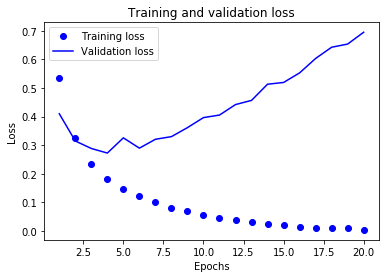

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

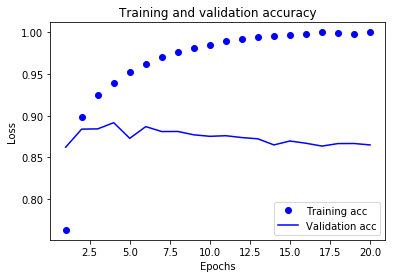

In [0]:
# plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

In [0]:
model.predict(x_test)

array([[0.1734449 ],
       [0.9998498 ],
       [0.58336014],
       ...,
       [0.10642025],
       [0.04956183],
       [0.54115206]], dtype=float32)